# Gradiente Descendente
Este es un ejemplo del uso del gradiente descendente para obtener los parámetros de un modelo supervisado por regresión lineal.

### Importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Datos

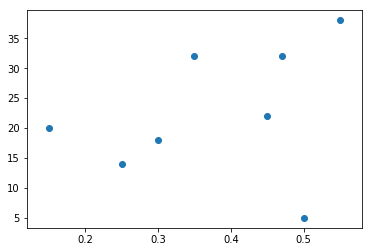

In [2]:
x = np.array([0.5, 0.15, 0.30, 0.25, 0.35, 0.45, 0.47, 0.55]).reshape((-1, 1))
y = np.array([5, 20, 18, 14, 32, 22, 32, 38])

plt.scatter(x,y)

### Preparación de funciones

In [3]:
def regresion_lineal(x,b):
    return np.array(b[0] + b[1]*x).reshape(1,-1)

# Definir la función de error cuadrático medio
def error_cuadratico(y,y_pred):
    return np.mean((y-y_pred)**2)
    
# Definir la función de gradiente del error
def grad_error(y,y_pred,x):
    return np.array ([-2*np.mean(y-y_pred),-2*np.mean((y-y_pred)*x)])

### Definición de híper-parámetros

In [4]:
eta      = 0.01
max_iter = 1000

### (1) Inicializar parámetros del modelo

In [5]:
# Inicializar parámetros de la regresión lineal y = w[0] + w[1]*x
w = np.random.rand (2)
print (w)

[0.86136941 0.34920764]


### (2) Evaluar el modelo en la función de error

In [6]:
# Obtener predicción del modelo
# Evaluar en la función de error
y_pred= regresion_lineal (x,w)
error = error_cuadratico (y,y_pred)
print (error)

570.8996552377284


### Iteraciones del método

In [7]:
for i in range(max_iter):
    # Calcular gradiente
    
    g = grad_error (y,y_pred,x)
    
    # Actualizar parámetros
    
    w = w - eta*g
    
    # Evaluar el modelo en la función del error
    y_pred = regresion_lineal (x,w)
    error = error_cuadratico (y,y_pred)
    print(error)

print(w)

549.6344944262439
529.328127480798
509.93728190831433
491.42063917997643
473.73874647777365
456.8539324276459
440.7302266391341
425.3332828795774
410.6303057186642
396.5899804865679
383.1824063959731
370.37903268506693
358.15259764502287
346.47707040167217
335.32759532694365
324.68043896127307
314.5129393335515
304.80345757030534
295.5313316906935
286.6768324885803
278.2211214074022
270.1462103178059
262.4349231121029
255.07085903346794
248.0383576615173
241.3224654794417
234.90890395125032
228.78403904090953
222.93485210824082
217.34891211938543
212.01434911245445
206.91982886166218
202.05452868580542
197.40811434939533
192.97071800708386
188.73291714425775
184.68571446879974
180.8205187110521
177.12912629095663
173.60370381319962
170.23677135295972
167.02118649654506
163.9501291028222
161.0170867528762
158.2158408568149
155.5404533880329
152.98525421659394
150.54482901466744
148.2140077081808
145.98785345001454
143.86165209118198
141.83090212750002
139.8913051002733
138.0387564304841

### Evaluación del método

13.813835770528684
23.340832395950503


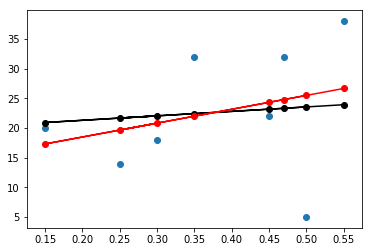

In [8]:
# Usando el modelo programado
y_pred = regresion_lineal(x,w)

# Usando el modelo de sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_pred_sk = model.predict(x)

plt.plot(x,y_pred[0,],marker='o',color='black')
plt.plot(x,y_pred_sk,marker='o',color='red')
plt.scatter(x,y)

print(model.intercept_)
print(model.coef_[0])

### En forma de función

In [9]:
def gd(x, y, eta = 0.01, max_iter = 1000):
    # Inicializar parámetros
    w = np.random.rand(2)
    
    # Evaluar modelo en función de error
    y_pred = regresion_lineal(x,w)
    error  = error_cuadratico(y,y_pred)
    
    for i in range(max_iter):
        # Calcular gradiente
        g = grad_error(y,y_pred,x)

        # Actualizar parámetros
        w = w - eta*g

        # Evaluar el modelo en la función del error
        y_pred = regresion_lineal(x,w)
        error = error_cuadratico(y,y_pred)

    return w

In [12]:
w_final = gd(x, y)

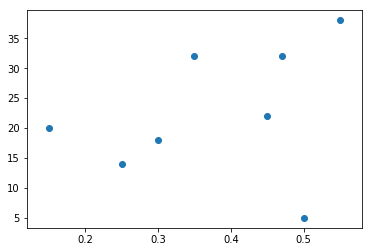

In [15]:
y_hat_gd = w[0] + w[1]* x
y_hat_gd
plt.scatter(x, y)

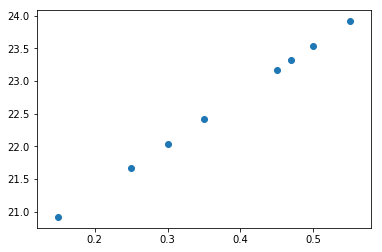

In [16]:
plt.scatter(x, y_hat_gd)

# Gradiente Descendente con Momento
Este es un ejemplo del uso del gradiente descendente con momento para obtener los parámetros de un modelo supervisado por regresión lineal.

In [17]:
def gdm(x, y, eta = 0.01, alpha = 0.1, max_iter = 1000):
    # Inicializar parámetros
    w     = np.random.rand(2)
    
    # Inicializar parámetros en la iteración anterior
    w_ant= w
    
    # Evaluar modelo en función de error
    y_pred = regresion_lineal(x,w)
    error  = error_cuadratico(y,y_pred)
    
    for i in range(max_iter):
        # Calcular gradiente
        g = grad_error(y,y_pred,x)
        
        # Calcular la diferencia de parámetros
        dw= w - w_ant
        w_ant = w

        
        # Actualizar parámetros
        w = w_ant- eta*g + alpha*dw

        # Evaluar el modelo en la función del error
        y_pred = regresion_lineal(x,w)
        error = error_cuadratico(y,y_pred)

    return w
    
    

### Ejecutar ambos métodos de gradiente

In [18]:
print(gd(x,y))
print(gdm(x,y))

[19.58645519  8.04912532]
[19.69880706  7.75150447]
